In [ ]:
!nvidia-smi

Sun Jun 27 14:39:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Creates arra
import csv
products = []
with open('/content/products.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        products.append(row)
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            #print(f'\t product_id :{row[0]}| product_name: {row[1]} | aisle_id: {row[2]} | department_id : {row[3]}')
            line_count += 1
    print(f'Processed {line_count} lines.')

FileNotFoundError: ignored

In [ ]:
#Function gives aisle id of a product
def getAisleID(product_id):
    target = int(product_id)
    skipfirstline = 0
    for i in products:
        if skipfirstline == 0:
            skipfirstline = 1
            continue
        product = int(i[0])
        if (product==target):
            aisle_id = int(i[2])
            return aisle_id
    print("product not found")
        

In [1]:
#Remove categories not in analysis
def removeCategories(order):
    acceptedCategories = [24,83,123,120,21,84,115,107,91,112,86,31,116,37,78,96,
                         67,16,121,77,98,54,72,50,108,36,52,63,69,17,61,66,4,
                         32,130,53,106,3,38,81,88,117,131,128,92,19,104,49,59,
                         26,43,9,129,35,93,79,51,45,94,23]
    for i in order:
        if i[1] not in acceptedCategories:
            order.remove(i)
    return order
    

In [ ]:
#Creates training data
import csv
train_orders=[]
with open('/content/order_products__prior.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    order_count=0
    prev=-1
    i=0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            #print(f'\t product_id :{row[0]}| product_name: {row[1]} | aisle_id: {row[2]} | department_id : {row[3]}')
                if (int(row[0])!=prev):
                    order_count+=1
                    i=1
                order_basket = [int(row[0]),getAisleID(int(row[1]))]
                train_orders.append(order_basket)
                #train_orders = removeCategories(train_orders)
                prev = int(row[0])
                line_count += 1
                if (order_count%500==0 and i==1):
                    print(order_count, "of", "30000")
                    i=0
                if(order_count>30000):
                #if(order_count>5000):
                    break
    print(f'Processed {line_count} lines.')

Column names are order_id, product_id, add_to_cart_order, reordered


KeyboardInterrupt: ignored

In [ ]:
#creates evaluation data
import csv
eval_orders=[]
with open('/content/order_products__train.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    order_count=0
    prev=-1
    i=0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            #print(f'\t product_id :{row[0]}| product_name: {row[1]} | aisle_id: {row[2]} | department_id : {row[3]}')
                if (int(row[0])!=prev):
                    order_count+=1
                    i=1
                order_basket_eval = [int(row[0]),getAisleID(int(row[1]))]
                eval_orders.append(order_basket_eval)
                #train_orders = removeCategories(train_orders)
                prev = int(row[0])
                line_count += 1
                if (order_count%500==0 and i==1):
                    print(order_count, "of", "10000")
                    i=0
                if(order_count>10000):
                    break
    print(f'Processed {line_count} lines.')

Column names are order_id, product_id, add_to_cart_order, reordered
500 of 10000
1000 of 10000
1500 of 10000
2000 of 10000
2500 of 10000
3000 of 10000
3500 of 10000
4000 of 10000
4500 of 10000
5000 of 10000
5500 of 10000
6000 of 10000
6500 of 10000
7000 of 10000
7500 of 10000
8000 of 10000
8500 of 10000
9000 of 10000
9500 of 10000
10000 of 10000
Processed 105406 lines.


In [ ]:
#Data processing
orders=[]
order_binary=[[0 for x in range(135)] for y in range(1)]
orders_binary = []
for i in train_orders: 
    if(int(i[0])!=prev):
        baskets=[]
        orders.append(baskets)
    baskets.append(i[1])
    m = int(i[1])-1
    order_count+=1
    prev = int(i[0])


NameError: ignored

In [ ]:
#data processing evalusation set
eval_fullorders=[]
order_binary=[[0 for x in range(135)] for y in range(1)]
orders_binary = []
for i in eval_orders: 
    if(int(i[0])!=prev):
        baskets=[]
        eval_fullorders.append(baskets)
    baskets.append(i[1])
    m = int(i[1])-1
    order_count+=1
    prev = int(i[0])


In [ ]:
#create orders of only 60 categories with the new number for categorie equal to the i-th accepted categorie in order of its' original number
import numpy as np
orders_bin = np.array(orders_binary)
remove_cat = orders_bin.T
acceptedCategories = [24,83,123,120,21,84,115,107,91,112,86,31,116,37,78,96,
                         67,16,121,77,98,54,72,50,108,36,52,63,69,17,61,66,4,
                         32,130,53,106,3,38,81,88,117,131,128,92,19,104,49,59,
                         26,43,9,129,35,93,79,51,45,94,23]
m=0
count=0
orders_binary_T=remove_cat.tolist()
orders2=[]
for i in orders:
  accorders_T=[]
  for j in i:
    if (int(j) in acceptedCategories):
        m+=1
        accorders_T.append(j)
    count+=1
  orders2.append(accorders_T)
print("orders:",len(orders2))
orders_60_T = np.array(accorders_T)
orders_60 = orders_60_T.T
count=0
print(orders2[1])

orders: 30001
[120, 91, 123, 123, 91, 83, 35, 112]


In [ ]:
#create orders of only 60 categories with the new number for categorie equal to the i-th accepted categorie in order of its' original number for evaluation set
import numpy as np
orders_bin = np.array(orders_binary)
remove_cat = orders_bin.T
acceptedCategories = [24,83,123,120,21,84,115,107,91,112,86,31,116,37,78,96,
                         67,16,121,77,98,54,72,50,108,36,52,63,69,17,61,66,4,
                         32,130,53,106,3,38,81,88,117,131,128,92,19,104,49,59,
                         26,43,9,129,35,93,79,51,45,94,23]
m=0
count=0
orders_binary_T=remove_cat.tolist()
orders2_eval=[]
for i in eval_fullorders:
  accorders_T=[]
  for j in i:
    if (int(j) in acceptedCategories):
        m+=1
        accorders_T.append(j)
    count+=1
  orders2_eval.append(accorders_T)
print("orders:",len(orders2_eval))
orders_60_T = np.array(accorders_T)
orders_60_eval = orders_60_T.T
count=0
print(orders2_eval[0])

orders: 10001
[120, 108, 83, 83, 24, 24, 21]


In [ ]:
#create dataset file for training
import random
file1 = open("ArtData.txt","w")
for i in orders2:
  #for l in range(6):
    str1 =""
    for j in i:
      if(str(j) not in str1):
        str1 = str1 + " "+ str(j) 
    str1 += " end ."
    file1.write(str1)
    #random.shuffle(i)
file1.close()

NameError: ignored

In [ ]:
#create dataset file for evaluation
import random
file2 = open("artData.txt","w")
for i in orders2_eval:
    str2 =""
    for j in i:
      if(str(j) not in str2):
        str2 = str2 + " "+ str(j)
    str2 += "."
    file2.write(str2)
    #random.shuffle(i)
file2.close()

In [ ]:
#Data is created and should be loaded, create tokenizer
!pip install tokenizers
from tokenizers import BertWordPieceTokenizer

from pathlib import Path
import glob
from tokenizers import ByteLevelBPETokenizer

tokenizer = BertWordPieceTokenizer(
  clean_text=False,
  handle_chinese_chars=False,
  strip_accents=False,
  lowercase=True,
)
files = ['myfileNoRepl6.txt']

# Customize training
tokenizer.train(
  files,
  vocab_size=100,
  min_frequency=3,
  show_progress=True,
  special_tokens=['[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]'],
  limit_alphabet=1000,
  wordpieces_prefix="##"
)
# Save files to disk
tokenizer.save_model(".", "Cross2Bert")

     |████████████████████████████████| 3.3MB 8.4MB/s 


['./Cross2Bert-vocab.txt']

In [ ]:
#Tokenizer add special tokens
from tokenizers.implementations import ByteLevelBPETokenizer
from tokenizers.processors import BertProcessing

tokenizer = BertWordPieceTokenizer(
        "/content/Cross2Bert-vocab.txt"
        )
tokenizer._tokenizer.post_processor = BertProcessing(
    ("[SEP]", tokenizer.token_to_id("[SEP]")),
    ("[CLS]", tokenizer.token_to_id("[CLS]")),
)
tokenizer.enable_truncation(max_length=60)
hello = tokenizer.encode("83 17 35")
print(
    hello
)
print(hello.tokens)
# Encoding(num_tokens=7, ...)
# tokens: ['<s>', 'Mi', 'Ġestas', 'ĠJuli', 'en', '.', '</s>']

Encoding(num_tokens=5, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
['[CLS]', '83', '17', '35', '[SEP]']


In [ ]:
#Tokenize training set
from torch.utils.data import Dataset

class CrossBertDataset(Dataset):
    def __init__(self, evaluate: bool = True):
        tokenizer = BertWordPieceTokenizer(
        "/content/Cross2Bert-vocab.txt"
        )
        tokenizer._tokenizer.post_processor = BertProcessing(
            ("[SEP]", tokenizer.token_to_id("[SEP]")),
            ("[CLS]", tokenizer.token_to_id("[CLS]")),
        )
        tokenizer.enable_truncation(max_length=100)
        # or use the RobertaTokenizer from `transformers` directly.

        self.examples = []

        src_files = Path("/content/").glob("myfileNoRepl6.txt") if evaluate else Path("/content/").glob("myfile_eval.txt")
        for src_file in src_files:
            print("hello", src_file)
            lines = src_file.read_text(encoding="utf-8").split(".")
            
            self.examples += [x.ids for x in tokenizer.encode_batch(lines)]

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, i):
        # We’ll pad at the batch level.
        return torch.tensor(self.examples[i])

In [ ]:
#Tokenize evaluation set
from torch.utils.data import Dataset

class CrossBertDataset_eval(Dataset):
    def __init__(self, evaluate: bool = False):
        tokenizer = BertWordPieceTokenizer(
        "/content/Cross2Bert-vocab.txt"
        )
        tokenizer._tokenizer.post_processor = BertProcessing(
            ("[SEP]", tokenizer.token_to_id("[SEP]")),
            ("[CLS]", tokenizer.token_to_id("[CLS]")),
        )
        tokenizer.enable_truncation(max_length=100)
        # or use the RobertaTokenizer from `transformers` directly.

        self.examples = []

        src_files = Path("/content/").glob("myfile.txt") if evaluate else Path("/content/").glob("myfile_evalNoRepl6.txt")
        for src_file in src_files:
            print("hello", src_file)
            lines = src_file.read_text(encoding="utf-8").split(".")
            
            self.examples += [x.ids for x in tokenizer.encode_batch(lines)]

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, i):
        # We’ll pad at the batch level.
        return torch.tensor(self.examples[i])

In [ ]:
#Give parameters for funtction
!pip install transformers
from transformers import BertModel, BertConfig, BertForMaskedLM

config = BertConfig(
    vocab_size=100,
    max_position_embeddings=514,
    num_attention_heads=12,
    num_hidden_layers=12,
    type_vocab_size=1,
)

model = BertForMaskedLM(config)
model.num_parameters()

     |████████████████████████████████| 2.5MB 8.5MB/s 
     |████████████████████████████████| 901kB 43.9MB/s 


86120548

In [ ]:
#Load tokenizer for model
from transformers import BertTokenizer

tokenizer = BertTokenizer("/content/Cross2Bert-vocab.txt", max_len=60)

In [ ]:
#Mask the data
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

In [ ]:
#Create training object
from transformers import Trainer, TrainingArguments
!pip install torch

training_args = TrainingArguments(
    output_dir="/content/CrossBert_10epoch_0.15_6shuffle",
    overwrite_output_dir=True,
    num_train_epochs=10,
    per_gpu_train_batch_size=64,
    save_steps=10_000,
    save_total_limit=2,
    prediction_loss_only=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=CrossBertDataset(),
    #eval_dataset=CrossBertDataset_eval(),
)

hello /content/myfileNoRepl6.txt


In [ ]:
#Start training
%%time
import torch
#trainer.num_examples()
trainer.train()


Using deprecated `--per_gpu_train_batch_size` argument which will be removed in a future version. Using `--per_device_train_batch_size` is preferred.
Using deprecated `--per_gpu_train_batch_size` argument which will be removed in a future version. Using `--per_device_train_batch_size` is preferred.
***** Running training *****
  Num examples = 180007
  Num Epochs = 10
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 28130
Using deprecated `--per_gpu_train_batch_size` argument which will be removed in a future version. Using `--per_device_train_batch_size` is preferred.


Step,Training Loss
500,3.752000


Step,Training Loss
500,3.752000
1000,3.436500


In [ ]:
#Evaluate model
trainer.evaluate()

{'epoch': 1.0,
 'eval_loss': 3.2109930515289307,
 'eval_runtime': 63.2628,
 'eval_samples_per_second': 948.536,
 'eval_steps_per_second': 118.569}

In [ ]:
#Save model
trainer.save_model("/content/Model_10Epoch_0.15_6shuffle")

In [ ]:
#Create object that calculated probability of masked object
!pip install transformers
from transformers import pipeline
from transformers import BertTokenizer,BertConfig,BertForMaskedLM,BertModel

fill_mask = pipeline(
    "fill-mask",
    model ="/content/Model_10Epoch_0.15_6shuffle" ,
    tokenizer= BertTokenizer("/content/Cross2Bert-vocab.txt", max_len=60),
    top_k=2                 
)

loading configuration file /content/Model_10Epoch_0.15_6shuffle/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 514,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.8.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 100
}

loading configuration file /content/Model_10Epoch_0.15_6shuffle/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "inte

In [ ]:
fullTokens = [24,83,123,120,21,84,115,107,91,112,86,31,116,37,78,96,
                         67,16,121,77,98,54,72,50,108,36,52,63,69,17,61,66,4,
                         32,130,53,106,3,38,81,88,117,131,128,92,19,104,49,59,
                         26,43,9,129,35,93,79,51,45,94,23]
fullTokens.sort()
print(fullTokens)

[3, 4, 9, 16, 17, 19, 21, 23, 24, 26, 31, 32, 35, 36, 37, 38, 43, 45, 49, 50, 51, 52, 53, 54, 59, 61, 63, 66, 67, 69, 72, 77, 78, 79, 81, 83, 84, 86, 88, 91, 92, 93, 94, 96, 98, 104, 106, 107, 108, 112, 115, 116, 117, 120, 121, 123, 128, 129, 130, 131]


In [ ]:
with open('artData.txt') as f:
    lines = f.read()
    currentline = lines.split(".")
counts = []
for i in currentline:
  counts.append(i.count(' '))

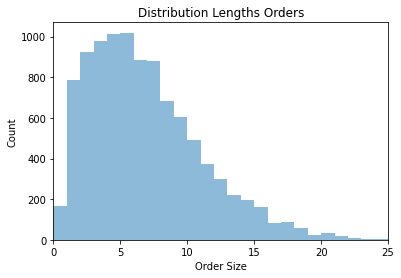

In [ ]:
#distribution of the data length
import numpy as np
import random
from matplotlib import pyplot as plt


# fixed bin size
bins = np.arange(-100, 100, 1) # fixed bin size

plt.xlim([0, 25])

plt.hist(counts, bins=bins, alpha=0.5)
plt.title('Distribution Lengths Orders')
plt.xlabel('Order Size')
plt.ylabel('Count')

plt.show()

In [ ]:
#Create artificial orders using bert
import random
import pandas as pd

class artOrders():
  def __init__(self):
    self.artOrder= ""

  def maskWord(self,orderList, fullTokens, length):
      if(length>5):
        length = length-2
      order = " ".join(orderList)
      prev  = 0
      artOrder =  ""
      for j in fullTokens:
        n = random.random()
        strJ = str(j)
        copyOrder = order.replace(strJ, '')
        y = fill_mask.__call__(str(copyOrder), targets=strJ)
        df = pd.DataFrame(y)
        score =(df.loc[0]['score'])
        probNot =(1-(1-score)**length)
        if(n<probNot):
          self.artOrder += strJ + " "
      return

  def main(self,order, fullTokens, length):
      self.artOrder = ""
      orderList = order.split(" ")
      orderList.remove("")
      if (length%2==0):
          midpoint = length/2
      else:
          midpoint = (length+1)/2
      orderList2 = orderList[0:int(midpoint)] + ["[MASK]"] + orderList[int(midpoint):]
      self.maskWord(orderList2,fullTokens, length)
      return self.artOrder


In [ ]:
#Restructure artificial orders in binary data
artDataset=[]
with open('artData.txt') as f:
    lines = f.read()
    currentline = lines.split(".")
dataset1 = artOrders()
count = 0
for i in currentline:
  if(count%100==0):
    print(count, " of 10000")
  if(count == 10000):
    break
  fullTokens = [3, 4, 9, 16, 17, 19, 21, 23, 24, 26, 31, 32, 35, 36, 37, 38, 43, 45, 49, 50,
                         51, 52, 53, 54, 59, 61, 63, 66, 67, 69, 72, 77, 78, 79, 81, 83, 84, 86, 88, 
                         91, 92, 93, 94, 96, 98, 104, 106, 107, 108, 112, 115, 116, 117, 120, 121, 123,
                         128, 129, 130, 131]
  artDataset.append(dataset1.main(i,fullTokens,random.choice(counts)))
  count+=1



0  of 10000
100  of 10000
200  of 10000
300  of 10000
400  of 10000
500  of 10000
600  of 10000
700  of 10000
800  of 10000
900  of 10000
1000  of 10000
1100  of 10000
1200  of 10000
1300  of 10000
1400  of 10000
1500  of 10000
1600  of 10000
1700  of 10000
1800  of 10000
1900  of 10000
2000  of 10000
2100  of 10000
2200  of 10000
2300  of 10000
2400  of 10000
2500  of 10000
2600  of 10000
2700  of 10000
2800  of 10000
2900  of 10000
3000  of 10000
3100  of 10000
3200  of 10000
3300  of 10000
3400  of 10000
3500  of 10000
3600  of 10000
3700  of 10000
3800  of 10000
3900  of 10000
4000  of 10000
4100  of 10000
4200  of 10000
4300  of 10000
4400  of 10000
4500  of 10000
4600  of 10000
4700  of 10000
4800  of 10000
4900  of 10000
5000  of 10000
5100  of 10000
5200  of 10000
5300  of 10000
5400  of 10000
5500  of 10000
5600  of 10000
5700  of 10000
5800  of 10000
5900  of 10000
6000  of 10000
6100  of 10000
6200  of 10000
6300  of 10000
6400  of 10000
6500  of 10000
6600  of 10000
6700  o

In [ ]:
#Create data to get the orders in binary numbers
orders_binary= []
fullTokens = [3, 4, 9, 16, 17, 19, 21, 23, 24, 26, 31, 32, 35, 36, 37, 38, 43, 45, 49, 50,
                         51, 52, 53, 54, 59, 61, 63, 66, 67, 69, 72, 77, 78, 79, 81, 83, 84, 86, 88, 
                         91, 92, 93, 94, 96, 98, 104, 106, 107, 108, 112, 115, 116, 117, 120, 121, 123,
                         128, 129, 130, 131]
for i in artDataset:
  order_binary = [[0 for x in range(135)] for y in range(1)]
  data = i.split(" ")
  data.remove('')
  for j in data:
    m = int(j)-1
    if (order_binary[0][m]==0):
      order_binary[0][m]+=1
    order_count+=1
  orders_binary.append(order_binary)
count = 0
print(orders_binary[0])
import numpy as np

orders_bin = np.array(orders_binary)
remove_cat = orders_bin.T
acceptedCategories = [24,83,123,120,21,84,115,107,91,112,86,31,116,37,78,96,
                         67,16,121,77,98,54,72,50,108,36,52,63,69,17,61,66,4,
                         32,130,53,106,3,38,81,88,117,131,128,92,19,104,49,59,
                         26,43,9,129,35,93,79,51,45,94,23]
m=0
count=0
orders_binary_T=remove_cat.tolist()
accorders_T=[]
for i in orders_binary_T:
    if (count+1 in acceptedCategories):
        m+=1
        accorders_T.append(i)
    count+=1
print("orders:",len(accorders_T))
orders_60_T = np.array(accorders_T)
orders_60 = orders_60_T.T
count=0
orders_60Art = orders_60

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
orders: 60


In [ ]:
#Create list of art order sizes
lengths=[]
for i in artDataset:
  lengths.append(i.count(" "))

21 24 32 49 92 96 123 
7


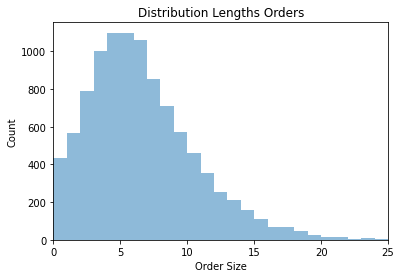

In [ ]:
#distribution of the data length
import numpy as np
import random
from matplotlib import pyplot as plt


# fixed bin size
bins = np.arange(-100, 100, 1) # fixed bin size

plt.xlim([0, 25])

plt.hist(lengths, bins=bins, alpha=0.5)
plt.title('Distribution Lengths Orders')
plt.xlabel('Order Size')
plt.ylabel('Count')

plt.show()

In [ ]:
#Creates arra
import csv
train_orders=[]
with open('/content/order_products__train.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    order_count=0
    prev=-1
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            #print(f'\t product_id :{row[0]}| product_name: {row[1]} | aisle_id: {row[2]} | department_id : {row[3]}')
                if (int(row[0])!=prev):
                    order_count+=1
                order_basket = [int(row[0]),getAisleID(int(row[1]))]
                train_orders.append(order_basket)
                prev = int(row[0])
                line_count += 1
                if(order_count==10000):
                    break
    print(f'Processed {line_count} lines.')

orders=[]
order_binary=[[0 for x in range(135)] for y in range(1)]
orders_binary = []
for i in train_orders: 
    if(int(i[0])!=prev):
        baskets=[]
        orders.append(baskets)
        order_binary = [[0 for x in range(135)] for y in range(1)]
        orders_binary.append(order_binary)
    baskets.append(i[1])
    m = int(i[1])-1
    if (order_binary[0][m]==0):
        order_binary[0][m]+=1
    order_count+=1
    prev = int(i[0])
print(orders_binary[0])
#create orders of only 60 categories with the new number for categorie equal to the i-th accepted categorie in order of its' original number
import numpy as np
orders_bin = np.array(orders_binary)
remove_cat = orders_bin.T
acceptedCategories = [24,83,123,120,21,84,115,107,91,112,86,31,116,37,78,96,
                         67,16,121,77,98,54,72,50,108,36,52,63,69,17,61,66,4,
                         32,130,53,106,3,38,81,88,117,131,128,92,19,104,49,59,
                         26,43,9,129,35,93,79,51,45,94,23]
m=0
count=0
orders_binary_T=remove_cat.tolist()
accorders_T=[]
for i in orders_binary_T:
    if (count+1 in acceptedCategories):
        m+=1
        accorders_T.append(i)
    count+=1
print("orders:",len(accorders_T))
orders_60_T = np.array(accorders_T)
orders_60 = orders_60_T.T
count=0

In [ ]:
#Calculate AD for artificial orders
import numpy as np
AD=np.zeros((500,10000,1,60))
for i in range(len(orders_60Art)):
    AD += abs(orders_60[i][0]-orders_60Art[i][0])
AD=AD/len(orders_60Art)
sumAdRbm = AD.sum(axis=0)
sumAdRbm = sumAdRbm.sum(axis=0)
adRbm = sum(sumAdRbm)
print(adRbm)

In [ ]:
#Cross-effects calculations function
import pandas as pd
import random
import numpy as np
from numpy import random

class getCrossEffects():
  def __init__(self, target, k, n):
    self.n = n
    self.target = target
    self.k = k
    self.fullTokens = [24,83,123,120,21,84,115,107,91,112,86,31,116,37,78,96,
                         67,16,121,77,98,54,72,50,108,36,52,63,69,17,61,66,4,
                         32,130,53,106,3,38,81,88,117,131,128,92,19,104,49,59,
                         26,43,9,129,35,93,79,51,45,94,23]
    self.tokensRest = [e for e in self.fullTokens if e not in (target, k)]

    #self.tokens = self.fullTokens.remove(self.target)
    #self.tokensRest = self.tokens.remove(self.k)

  def getRandomOrders(self):
    random_ordersNoK = []
    random_ordersWithK = []
    for i in range(self.n):
      orderNoK = ""
      orderWithK = ""
      order_size = random.randint(2,20)
      if(order_size<0):
        order_size=2
      target_element = random.randint(0, order_size)
      k_element = random.randint(0, order_size)
      while(k_element == target_element):
        k_element = random.randint(0, order_size)
      for j in range(int(order_size)):
        random_element = random.choice(self.tokensRest)
        if(j == k_element):
          orderWithK+= str(self.k) + " "
          orderNoK += str(random_element)+ " "
          continue
        if(j == target_element):
          orderNoK+="[MASK]" + " "
          orderWithK += "[MASK]"+" "
        orderNoK += str(random_element)+ " "
        orderWithK += str(random_element)+" "
      random_ordersNoK.append(orderNoK)
      random_ordersWithK.append(orderWithK)
    return random_ordersNoK, random_ordersWithK

  def scoreYesK(self, random_ordersWithK):
    sumYesK=0
    for order in random_ordersWithK:
      y = fill_mask.__call__(order, targets=str(self.target)+ " ")
      df = pd.DataFrame(y)
      sumYesK +=df.loc[0]['score']
    return sumYesK

  def scoreNoK(self, random_ordersNoK):
    sumNoK=0
    for order in random_ordersNoK:
      y = fill_mask.__call__(order, targets=str(self.target))
      df = pd.DataFrame(y)
      sumNoK +=df.loc[0]['score']
    return sumNoK
  def getPercentage(self):
    random_ordersNoK, random_ordersWithK = self.getRandomOrders()
    change = self.main()
    
    return perc

  def main(self):
    random_ordersNoK, random_ordersWithK = self.getRandomOrders()
    scoreYesK = self.scoreYesK(random_ordersWithK)
    scoreNoK = self.scoreNoK(random_ordersNoK)
    crossProb = (scoreYesK - scoreNoK)/len(random_ordersWithK)
    perc = crossProb / (self.scoreNoK(random_ordersNoK)/len(random_ordersNoK))
    return crossProb, perc

In [ ]:
#Write the cross-effects
import math
import time
import math
Tokens = [24,83,123,120,21,84,115,107,91,112,86,31,116,37,78,96,
                         67,16,121,77,98,54,72,50,108,36,52,63,69,17,61,66,4,
                         32,130,53,106,3,38,81,88,117,131,128,92,19,104,49,59,
                         26,43,9,129,35,93,79,51,45,94,23]
Tokens.sort()
tStats = np.zeros((60,60))
StDevs = np.zeros((60,60))
averages = np.zeros((60,60))
t0 = time.time()
count = 30
for i in range(6,12):
  nameCrossEffects = "tstatsBert" + str(i) + ".txt"
  nameAverage = "averagesBert"+ str(i) + ".txt"
  namePercIncr = "percentageBert"+ str(i) + ".txt"
  #tStatsBERT = open(nameCrossEffects,"w")
  averagesBERT = open(nameAverage,"w")
  percentageIncreasingBERT = open(namePercIncr,"w")
  for z in range(5):
    for j in range(60):
      average=[]
      totalP = 0
      average = 0
      tStat = 0
      totalperc=0
      x = []
      cross = getCrossEffects(Tokens[count],Tokens[j],25)
      datasets = 1
      print(j)
      for k in range(datasets):
        x_i,perc = cross.main()
        x.append(x_i)
        totalP +=x_i
        totalperc+=perc
      average = totalP/ datasets
      averagePerc = totalperc/datasets
      #std = np.sqrt(np.sum(np.power(np.array(x) - average,2))/datasets)
      #tStat = average / (std/math.sqrt(datasets))
      #tStatsBERT.write(str(tStat)+", ")
      averagesBERT.write(str(average)+", ")
      percentageIncreasingBERT.write(str(averagePerc)+", ")
    print(count,j)
    count +=1
  averagesBERT.close()
  #tStatsBERT.close()
  percentageIncreasingBERT.close()
print("cat :", i , " calculated" )
